In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
from imagesc import imagesc

import retinotopic_mapping 
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [2]:
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'

In [3]:
# Access pipeline
map = dj.create_virtual_module('map.py', 'pipeline_map')

Please enter DataJoint password:  ········


Connecting eflab@139.91.171.210:3306


In [4]:
map.RetMapScan()

animal_id id number,ret_idx retinotopy map index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement
9254,1,1,4,horizontal
9254,1,1,5,vertical
9329,1,1,5,vertical
9329,1,1,6,horizontal
9508,1,1,5,horizontal
9508,1,1,6,vertical
9579,1,1,6,horizontal
9579,1,1,7,vertical
9580,1,2,5,horizontal
9580,1,2,6,vertical


In [4]:
map.OptImageBar()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [5]:
hor_ang = (map.OptImageBar() & 'animal_id=9254' & 'axis="horizontal"').fetch1('ang')
hpositiveInput = (hor_ang > 0)
hor_l = np.mod(hor_ang, 2*np.pi)
hor_l[(hor_l == 0) & hpositiveInput] = 2*np.pi
h_mn = np.percentile(hor_l, 1)
h_mx = np.percentile(hor_l, 99)
hor_l[hor_l>h_mx]=h_mx
hor_l[hor_l<h_mn]=h_mn

Text(0.5, 1.0, 'ang_after')

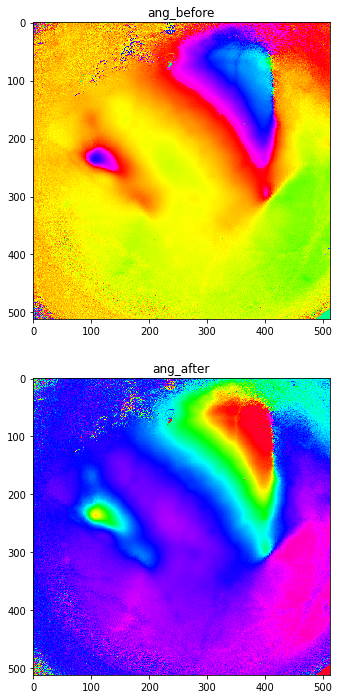

In [7]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(hor_ang, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(hor_l, cmap='gist_rainbow', interpolation='nearest')
plt.title('ang_after')

In [8]:
vert_ang = (map.OptImageBar() & 'animal_id=9254' & 'axis="vertical"').fetch1('ang')
vpositiveInput = (vert_ang > 0)
vert_l = np.mod(vert_ang, 2*np.pi)
vert_l[(vert_l == 0) & vpositiveInput] = 2*np.pi
v_mn = np.percentile(vert_l, 1)
v_mx = np.percentile(vert_l, 99)
vert_l[vert_l>v_mx]=v_mx
vert_l[vert_l<v_mn]=v_mn

Text(0.5, 1.0, 'ang_after')

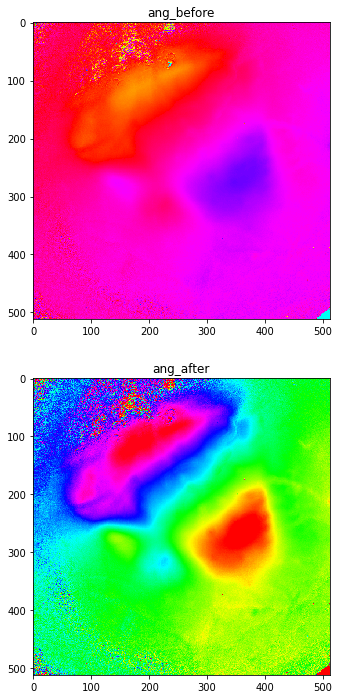

In [9]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(vert_ang, cmap='hsv', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(vert_l, cmap='hsv', interpolation='nearest')
plt.title('ang_after')

In [10]:
azi_amp, azi_ang, azi_vessels = (map.OptImageBar() & 'animal_id=9254' & 'axis="horizontal"').fetch1('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = (map.OptImageBar() & 'animal_id=9254' & 'axis="vertical"').fetch1('amp', 'ang', 'vessels')


In [11]:
params = {
          'phaseMapFilterSigma': 0.5,   # FLOAT, default = 1.0, recommended range: [0.0, 2.0]
          'signMapFilterSigma': 8.,     # FLOAT, default = 9.0, recommended range: [0.6, 10.0]
          'signMapThr': 0.4,            # FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1)
          'eccMapFilterSigma': 15.0,    # FLOAT, default = 10.0, do not change
          'splitLocalMinCutStep': 5.,   # FLOAT, default = 5.0, recommend range: [0.5, 15.0]
          'closeIter': 3,               # INT, default = 3, do not change
          'openIter': 3,                # INT, default = 3, do not change
          'dilationIter': 15,           # INT, default = 15, do not change
          'borderWidth': 1,             # INT, default = 1, do not change
          'smallPatchThr': 100,         # INT, default = 100, do not change
          'visualSpacePixelSize': 0.5,  # FLOAT, default = 0.5, do not change
          'visualSpaceCloseIter': 15,   # INT, default = 15, do not change
          'splitOverlapThr': 1.1,       # FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0
          'mergeOverlapThr': 0.1        # FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0
          }

In [12]:
trial = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='9254',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

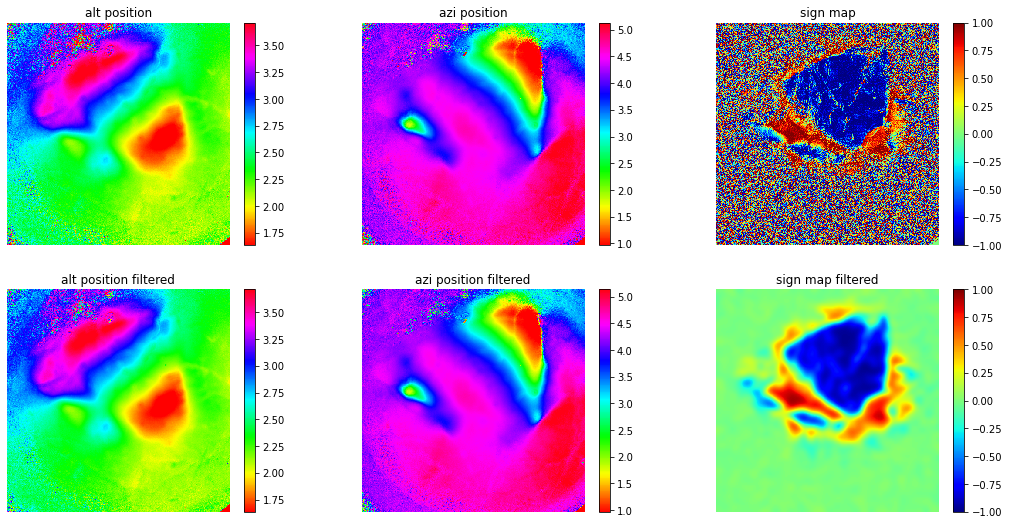

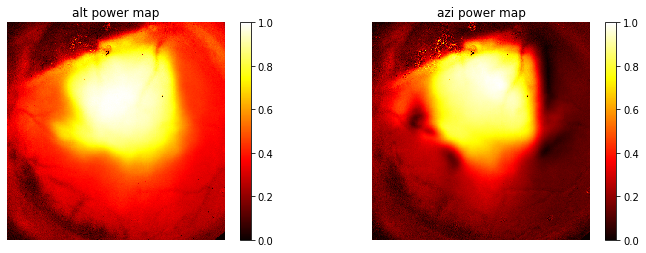

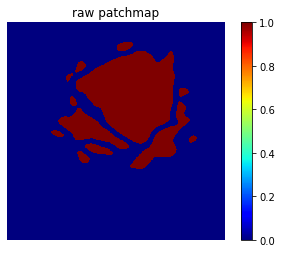

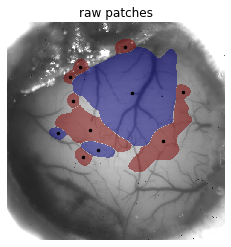

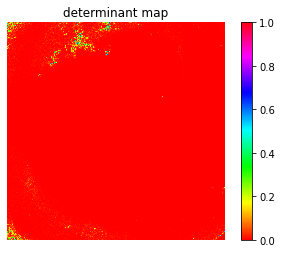

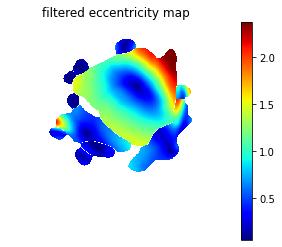

patch01AU=9.75 AS=7.179057 ratio=0.7363135509001904
patch02AU=3.5 AS=1.5900137 ratio=0.4542896406991141
patch03AU=4.5 AS=1.9956172 ratio=0.44347047805786133
patch04AU=1.5 AS=0.19438672 ratio=0.12959114710489908
patch05AU=1.75 AS=0.45777333 ratio=0.2615847587585449
patch06AU=1.5 AS=0.25454623 ratio=0.1696974833806356
patch07AU=0.5 AS=0.060970597 ratio=0.12194119393825531
patch08AU=1.75 AS=0.5633196 ratio=0.3218969276973179
patch09AU=1.5 AS=0.6817448 ratio=0.4544965426127116
patch10AU=0.5 AS=0.04973879 ratio=0.09947758167982101
patch11AU=0.5 AS=0.043933585 ratio=0.08786717057228088


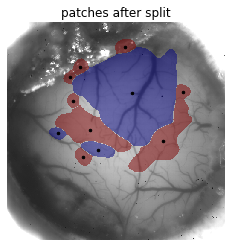

merge iteration: 1


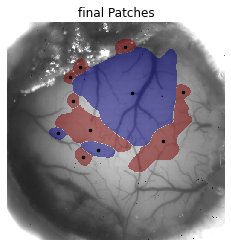

In [13]:
trial.processTrial(isPlot=True)

In [14]:
# default values
paramsd = {
          'phaseMapFilterSigma': 1, 
          'signMapFilterSigma': 9,
          'signMapThr': 0.35,
          'eccMapFilterSigma': 10.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [15]:
triald = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='9254',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=paramsd)

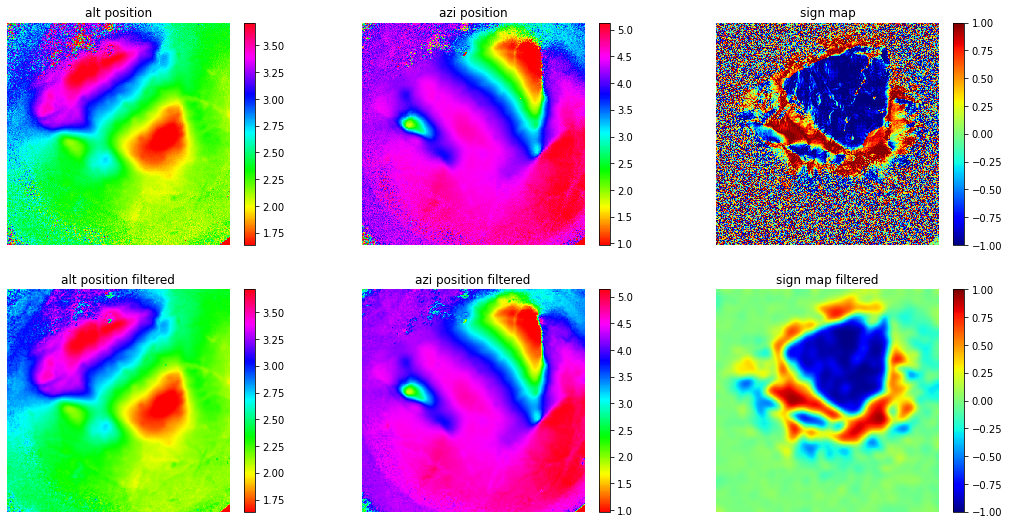

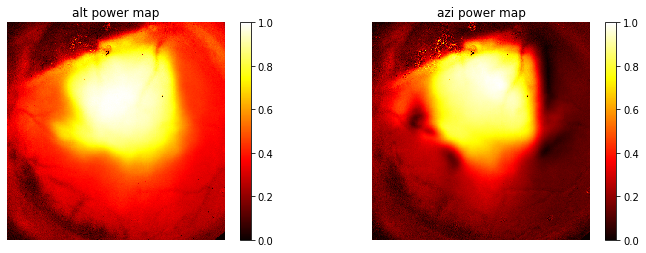

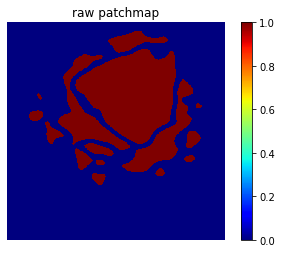

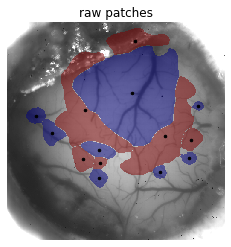

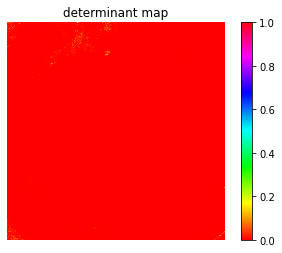

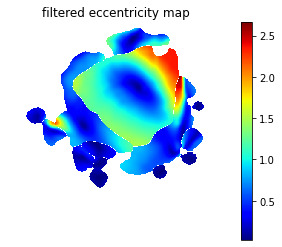

patch01AU=9.75 AS=6.4505434 ratio=0.6615941952436398
patch02AU=5.5 AS=2.5809906 ratio=0.46927100961858575
patch03AU=3.75 AS=2.3747323 ratio=0.6332619349161784
patch04AU=4.0 AS=2.1843226 ratio=0.5460806488990784
patch05AU=3.0 AS=1.2783011 ratio=0.42610037326812744
patch06AU=1.5 AS=0.28139344 ratio=0.18759562571843466
patch07AU=1.5 AS=0.1818015 ratio=0.12120099862416585
patch08AU=2.0 AS=0.35686666 ratio=0.17843332886695862
patch09AU=0.75 AS=0.05318978 ratio=0.0709197074174881
patch10AU=1.0 AS=0.31519473 ratio=0.3151947259902954
patch11AU=0.75 AS=0.046862505 ratio=0.06248334050178528
patch12AU=1.0 AS=0.032368362 ratio=0.032368361949920654
patch13AU=0.5 AS=0.0506488 ratio=0.10129760205745697
patch14AU=0.5 AS=0.047537617 ratio=0.09507523477077484


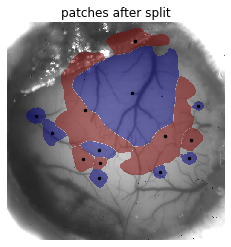

merge iteration: 1


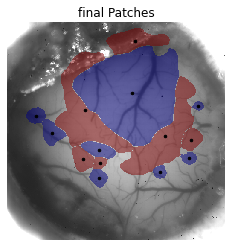

In [16]:
triald.processTrial(isPlot=True)